---
title: "Introduction | 그래프, 이미지 이퀼라이징"
author: "강신성"
date: "2023-10-05"
date-format: iso
categories: [python, image]
image: "Unequalized_Hawkes_Bay_NZ.jpg"
---

> 파이썬을 이용하여 간단한 그래프를 그려보고, 이미지를 이퀼라이징하는 방법을 알아보도록 하자.

## 1. 사전작업
* 라이브러리 import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##--------이퀼라이징을 위한 라이브러리--------
#!pip install opencv-python
import cv2

##--------parameter 설정--------
import matplotlib
matplotlib.rcParams['figure.figsize'] = (3,2)
matplotlib.rcParams['figure.dpi'] = 150 ## 450 : 300

* 오늘 알아볼 함수들

```
plt.boxplot()      ## 박스플롯 생성
np.random.randn()  ## 정규분포 하 확률변수 추출(default : 표준정규분포에서 1개 추출)
np.random.seed()   ## 시드 생성
plt.hist()         ## 히스토그램 생성
cv2.imread()       ## 이미지를 행렬로 읽어들임
plt.imshow()       ## 행렬로 저장된 이미지를 시각화
cv2.equalizeHist() ## 히스토그램 이퀼라이징

!wget link         ## 파일 다운로드(리눅스)
```

## 2. 플롯

### **A. Boxplot**

| 전북고등학교에는 10명의 학생이 있는 두 개의 학급이 있고, 각 학생들이 받은 점수는 아래와 같다.

In [4]:
y1 = [75,75,76,76,77,77,78,79,79,98]
y2 = [76,76,77,77,78,78,79,80,80,81]

In [ ]:
y1_frame = pd.DataFrame(y1)
y1_frame.describe()

,0
count,10.000000
mean,79.000000
std,6.831301
min,75.000000
25%,76.000000
50%,77.000000
75%,78.750000
max,98.000000


\- 1반의 평균은 $79$

In [5]:
y2_frame = pd.DataFrame(y2)
y2_frame.describe()

,0
count,10.00000
mean,78.20000
std,1.75119
min,76.00000
25%,77.00000
50%,78.00000
75%,79.75000
max,81.00000


\- 2반의 평균은 $78.2$이다.

그렇다면 1반(y1)과 2반(y2), 두 반을 지도하는 선생님 중 어떤 선생님이 우수할까?

> **아마도...** : 평균을 중심으로 분석할 시 y1이 더 잘 지도했다고 판단할 수 있다.
>
> <span style="color:red">**반론**</span> : 평균은 A반이 더 높으나, 편차또한 더 크다. 고득점을 받는 한 학생(outlier)을 제외하면 전체적으로 B반 학생들이 시험을 더 잘 보았다고 해석할 수 있다.

<span style="background-color:yellow">**단순한 평균비교보다 학생들이 받은 점수의 분포를 비교하는 것이 중요.**</span>

따라서 그 분포를 알아보기 위해 Boxplot을 그려보자.

### matplotlib로 boxplot 그리기

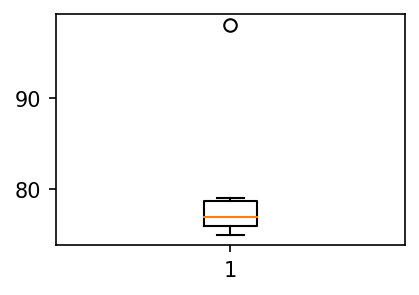

In [7]:
plt.boxplot(y1);  ## 세미콜론을 붙이면 결과값만 출력한다.

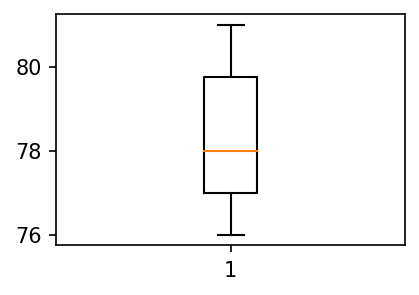

In [ ]:
plt.boxplot(y2);

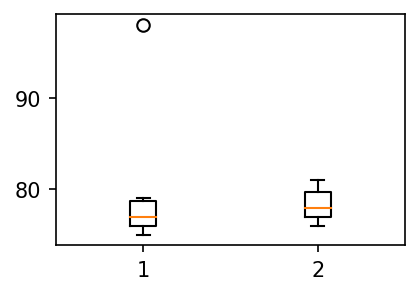

In [15]:
plt.boxplot([y1,y2]); ## 2차원의 리스트를 넣어 여러 개를 동시에 출력시킬 수도 있다.

##np.array([y1, y2]).shape ## > (2, 10)

위처럼 하나의 outlier를 배제한다면, 나머지의 분포는 2반이 더 높게 위치함을 알 수 있다.

- 박스플롯의 장점 : 단순히 평균만 제공하는 것보다 데이터를 파악하고 직관을 얻기에 유용하다.

- 박스플롯이 이용되는 범위 : 초기 자료 분포를 파악하기 용이, 두 개 이상의 방법을 비교

### **B. Histogram**

\- 중심경향치(평균, 중앙값)만 가지고 집단을 비교할 순 없다.

이전의 자료도 결과론적으로 중앙값이 더 타당해 보이나, 이것을 근거로 **B반이 공부를 더 잘했다**는 주장도 **비합리적**이다.

* 단순 평균비교로 이러한 질문에 답을 하기 어려움.
* 박스플롯으로 전체분포를 파악해도 어떤 반이 공부를 더 잘한다는 기준을 잡기 애매함.

**But!**

**특수한 경우에는 두 반 중에 누가 더 공부를 잘하냐는 질문에 명확히 대답할 수 있다.**

| 정규분포 전북고등학교 : 평균은 좋은 측정값인가?

In [ ]:
np.random.seed(43052)
y1 = np.random.randn(10000)   ## random.randn, standard normal distribution
y2 = np.random.randn(10000) + 0.5

\- 두 반의 성적은 모두 표준정규분포를 따르는데, 2반의 성적이 일괄적으로 0.5가 높은 상황

In [19]:
np.mean(y1), np.mean(y2)

(-0.011790879905079434, 0.4979147460611458)

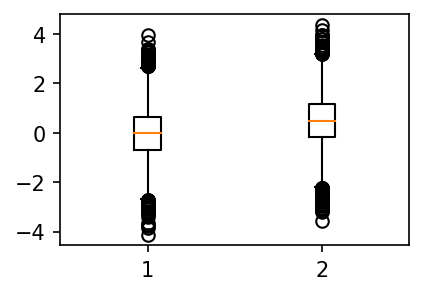

In [20]:
plt.boxplot([y1,y2]);

* 분포의 모양이 거의 비슷한데, 중앙값(평균)이 2반이 더 높으므로 성적이 더 높다고 말할 수 있다.
> **게다가 평균적으로 0.5점 정도 더 공부를 잘한다고 대답할 수 있다!**

근데, 위와 같은 경우는 정규분포에서 뽑힌 랜덤샘플이라 분포의 모양이 같다고 하긴 했는데... 실제 데이터를 확인할 때는 박스플롯으로 하긴 어려워보인다.

**따라서!**

**히스토그램을 그려 확인해보자**

```plt.hist(array, bins = int, range = list)```

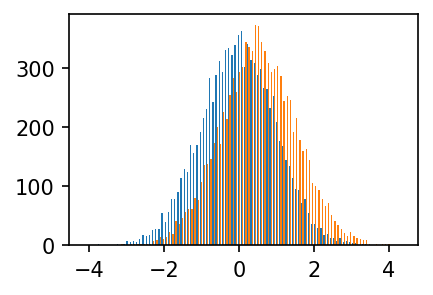

In [27]:
plt.hist([y1, y2], bins = 100);

> 둘의 분포는 비슷하지만, 2반(주황색)이 조금 더 높은 수준에서 자리함을 알 수 있다.

## 3. Equalization

**히스토그램이나 이미지를 눈으로 보기 쉽도록 이퀼라이징해보자!**

*이미지 자료 다운로드*

In [3]:
#!pip install wget
import wget

wget.download("https://upload.wikimedia.org/wikipedia/commons/0/08/Unequalized_Hawkes_Bay_NZ.jpg")
img = cv2.imread("Unequalized_Hawkes_Bay_NZ.jpg")

##--------리눅스 환경 충족 시--------
##!wget https://upload.wikimedia.org/wikipedia/commons/0/08/Unequalized_Hawkes_Bay_NZ.jpg
##img = cv2.imread('https://upload.wikimedia.org/wikipedia/commons/0/08/Unequalized_Hawkes_Bay_NZ.jpg')
##!rm Unequalized_Hawkes_Bay_NZ.jpg

## 파일을 들여오고 인식한 뒤 삭제하는 코드이다.

100% [............................................................................] 110895 / 110895

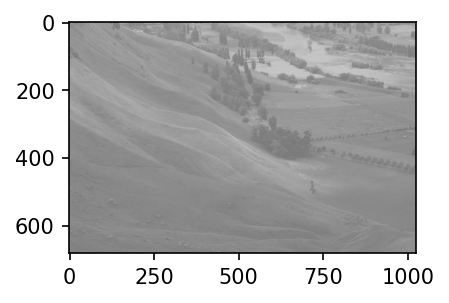

In [6]:
plt.imshow(img) ## image show

> ```plt.imshow()```를 통해서 이미지를 가져왔다!

근데, ```img```는 어떤 값으로 저장된 걸까?

### **A. 사실 이미지는 숫자열이었다!**

In [8]:
_img1 = np.array([0,30,90,120,150,180,210,240,255]).reshape(3,-1)  ## 3행 3열로 변경
_img1

array([[  0,  30,  90],
       [120, 150, 180],
       [210, 240, 255]])

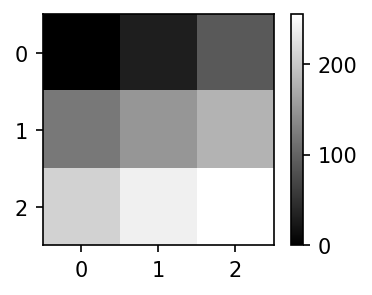

In [9]:
plt.imshow(_img1, cmap = 'gray')
plt.colorbar()
plt.show()

In [10]:
_img2 = np.array([0,20,40,60,80,100,120,140,160]).reshape(3,3)
_img2

array([[  0,  20,  40],
       [ 60,  80, 100],
       [120, 140, 160]])

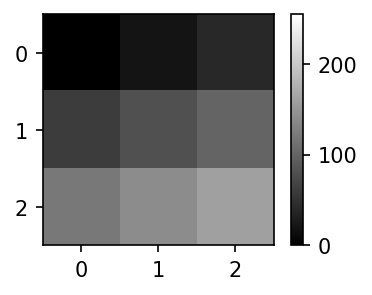

In [28]:
plt.imshow(_img2, cmap = 'gray', vmin = 0, vmax = 255)  ## vmin, vmax를 설정해주지 않으면 가장 큰 값이 max(white)가 된다
plt.colorbar()
plt.show()

255에 가까울 수록 하얀색, 0에 가까울 수록 검정색인 이미지로 변환된 것을 볼 수 있다. 숫자만으로 이뤄진 행렬이 이미지가 된 것이다!

**크게, 더 크게 해보자!**

In [34]:
_img3 = np.concatenate([_img1,_img2], axis = 1)  ## 열로 병합, default는 행으로 병합
_img3

array([[  0,  30,  90,   0,  20,  40],
       [120, 150, 180,  60,  80, 100],
       [210, 240, 255, 120, 140, 160]])

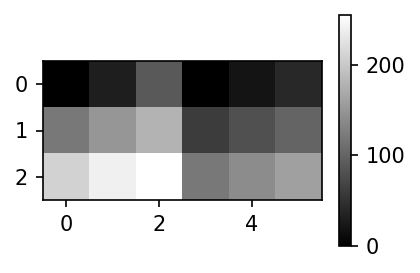

In [36]:
plt.imshow(_img3, cmap = 'gray')
plt.colorbar()
plt.show()

### **B. RGB값을 더한 그림 그리기**

* 먼저, RGB값에 해당하는 수를 각각 array로 지정해주자.

In [39]:
r = np.array(
    [[255, 255, 255,  0,   0],
     [255, 255, 255,  0,   0],
     [255, 255, 255,  0,   0],
     [  0,   0,   0,  0,   0],
     [  0,   0,   0,  0,   0]]
)
g = np.array(
    [[  0,   0, 255, 255, 255],
     [  0,   0, 255, 255, 255],
     [  0,   0, 255, 255, 255],
     [  0,   0,   0,   0,   0],
     [  0,   0,   0,   0,   0]]
)
b = np.array(
    [[  0,   0,   0,   0,   0],
     [  0,   0,   0,   0,   0],
     [255, 255, 255, 255, 255],
     [255, 255, 255, 255, 255],
     [255, 255, 255, 255, 255]]
)
z = np.array(
    [[ 0,  0,  0,  0,  0],
     [ 0,  0,  0,  0,  0],
     [ 0,  0,  0,  0,  0],
     [ 0,  0,  0,  0,  0],
     [ 0,  0,  0,  0,  0]]
)

* 그리고 합쳐서 RGB값을 할당해준다.

In [49]:
red = np.stack([r,z,z], axis = -1)
green = np.stack([z,g,z], axis = -1)
blue = np.stack([z,z,b], axis = -1)

In [50]:
temp = np.stack([r,g,b], axis = -1);temp

array([[[255,   0,   0],
        [255,   0,   0],
        [255, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[255,   0, 255],
        [255,   0, 255],
        [255, 255, 255],
        [  0, 255, 255],
        [  0, 255, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]]])

> 원소 하나 당 3개의 값이 할당된 것을 알 수 있다.

> ```np.stack([], axis = -1)```  크기가 동일한 행렬들의 각 원소들을 리스트화 하여 원소로 저장한다.

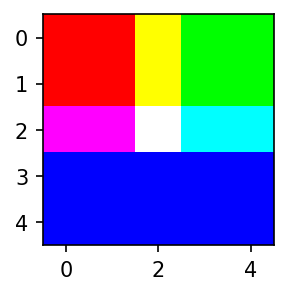

In [55]:
plt.imshow(red+green+blue)
plt.show()

R, G, B를 같은 비율로 섞으면 다시 흑백이미지가 된다.

In [52]:
arr2 = np.array([[10, 40], [80, 60]])
arr2

array([[10, 40],
       [80, 60]])

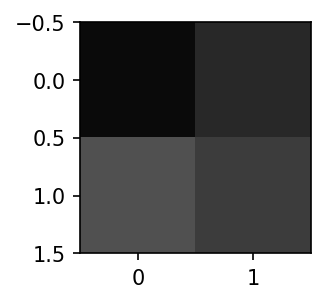

In [54]:
arr3 = np.stack([arr2, arr2, arr2], axis = -1)  ## rgb값이 각각 동일
plt.imshow(arr3)
plt.show()

In [ ]:
img.shape ## 원소의 리스트 수가 3이라는 것으로 rgb가 포함되어 있음을 추측할 수 있음.

(683, 1024, 3)

### **C. 히스토그램 이퀼라이징**

*그래서 이퀼라이징은 뭐냐고!*

> ```img```에서 추출해온 행렬로 아래와 같은 히스토그램을 만들어보자.

In [73]:
r = img[:, :, 0]  ## 첫 번째 원소
g = img[:, :, 1]  ## 두 번째 원소
b = img[:, :, 2]  ## 세 번째 원소

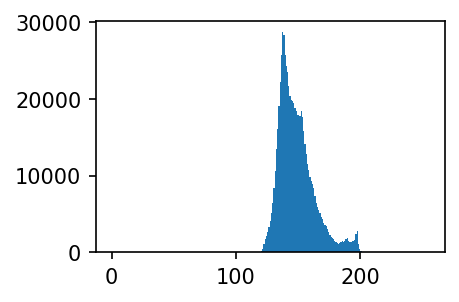

In [58]:
plt.hist(r.reshape(-1),bins=255, range=[0,255])
plt.show()

* 120~200 사이에 값이 몰려있음
* 120\~200의 분포된 모양은 그대로 유지하면서 range를 0~255까지 늘린다면?

In [59]:
rr = cv2.equalizeHist(r)
gg = cv2.equalizeHist(g)
bb = cv2.equalizeHist(b)

> cv2 라이브러리의 equalizeHist() 사용하면 행렬의 모든 원소들의 분포 정도를 고르게(0~255) 바꾼다.

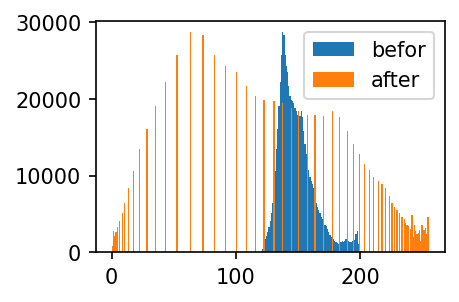

In [61]:
plt.hist(r.reshape(-1),bins=255, range=[0,255],label='befor');
plt.hist(rr.reshape(-1),bins=255,range=[0,255],label='after');  ## cv2.equalizeHist() 사용
plt.legend()
plt.show()

**그렇다면 이것을 응용하여 위에서의 이미지를 이퀼라이징하면?**

\- 이퀼라이징된 각 원소들을 다시 이어붙여 하나의 이미지로 만들어본다.

In [74]:
img2 = np.stack([rr,gg,bb], axis = -1)  ## axis = -1 > z축(원소 내에서 확장)으로 추가
img2.shape

(683, 1024, 3)

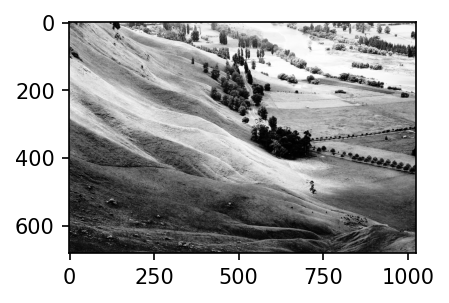

In [69]:
plt.imshow(img2)
plt.show()

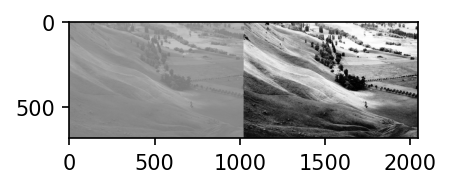

In [75]:
plt.imshow(np.concatenate([img,img2], axis = 1))
plt.show()

> 이렇게, 이미지를 조금 더 구별하기 쉽도록 바꿀 수 있다.